In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
df=pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


remove outlier

In [2]:
q1=df['age'].quantile(0.25)
print("q1",q1)
q3=df['age'].quantile(0.75)
print("q3",q3)
iqr=q3-q1
print("iqr",iqr)
lower_limit=q1-1.5*iqr
print("lower limit=",lower_limit)
upper_limit=q3+1.5*iqr
print("upper limit",upper_limit)
outlier=df[(df['age']<lower_limit) | (df['age']>upper_limit)]
print(outlier)

q1 22.0
q3 55.0
iqr 33.0
lower limit= -27.5
upper limit 104.5
    age  bought_insurance
39  128                 1
40  115                 1


In [3]:
df.describe()

,age,bought_insurance
count,41.000000,41.000000
mean,42.121951,0.536585
std,25.459964,0.504854
min,10.000000,0.000000
25%,22.000000,0.000000
50%,45.000000,1.000000
75%,55.000000,1.000000
max,128.000000,1.000000


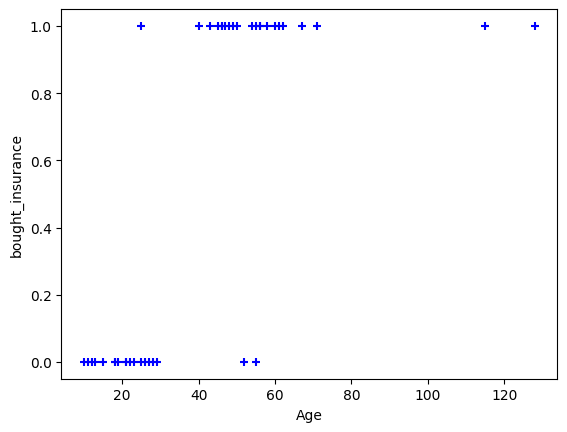

In [4]:
plt.scatter(df['age'],df['bought_insurance'],marker="+",color='blue')
plt.xlabel("Age")
plt.ylabel("bought_insurance")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df['bought_insurance'],test_size=0.1)


In [7]:
x_test

,age
14,49
29,12
25,54
40,115
19,18


In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [9]:
import numpy as np
model.predict(x_test)


array([1, 0, 1, 1, 0], dtype=int64)

In [10]:
model.score(x_test,y_test)

1.0

we can also calculate of prob value of no and yes 

In [11]:
model.predict_proba(x_test)

array([[1.60488084e-01, 8.39511916e-01],
       [9.78476037e-01, 2.15239627e-02],
       [8.36326394e-02, 9.16367361e-01],
       [1.10347535e-05, 9.99988965e-01],
       [9.49289001e-01, 5.07109992e-02]])

In [12]:
import joblib 
joblib.dump(model,"LogisticRegression_model")

['LogisticRegression_model']

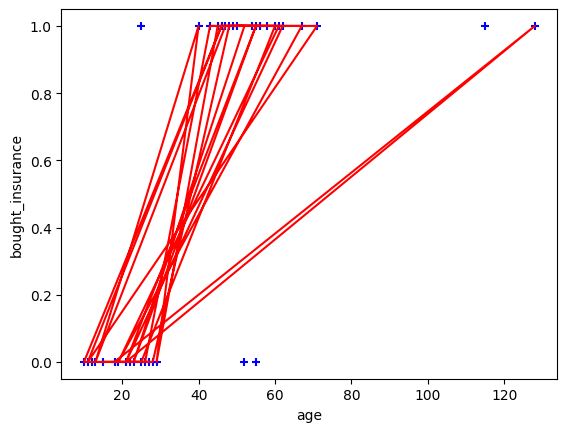

In [13]:
plt.scatter(df['age'],df['bought_insurance'],marker="+",color="blue")
plt.plot(x_train,model.predict(x_train),color='red')
plt.xlabel("age")
plt.ylabel("bought_insurance")
plt.show()

In [14]:
x=np.array([[35]])
model.predict(x)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)